<a href="https://colab.research.google.com/github/GabrielaRomoM/CDS-2025-1/blob/main/CircuitoRLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solución numérica de un circuito L-RC

---

## Preliminares

In [ ]:
import numpy as np   # Herramientas matemáticas de propósito general
import scipy as sp   # Para el integrador numérico de ODEs
from matplotlib import pyplot as plt   # Para dibujar

---
## Representación del sistema como un espacio de estados

Representación en Espacio de estados circuito RLC #1

$$\underbrace{\left( \begin{array}{c} \dot V_c \\ \dot i_l \end{array} \right)}_{\mathbf{\dot X}} = \underbrace{\left( \begin{array}{cc} -\frac{1}{RC}  & -\frac{1}{C} \\ -\frac{1}{L} & 0\end{array} \right)}_{\mathbf{A}}  \underbrace{\left( \begin{array}{c} V_c \\ i_l \end{array} \right)}_{\mathbf{X}}  +  \underbrace{\left(  \begin{array}{c} \frac{1}{RC} \\ 0  \end{array} \right)}_{\mathbf{B}} \underbrace{v_{in}}_{\mathbf{U}} $$

Representación en Espacio de estados circuito RLC #2

$$\underbrace{\left( \begin{array}{c} \dot V_c \\ \dot i_l \end{array} \right)}_{\mathbf{\dot X}} = \underbrace{\left( \begin{array}{cc} -\frac{1}{R_2C}  & - \frac{1}{C} \\ -\frac{1}{L} & -\frac{R1}{L}\end{array} \right)}_{\mathbf{A}}  \underbrace{\left( \begin{array}{c} V_c \\ i_l \end{array} \right)}_{\mathbf{X}}  +  \underbrace{\left(  \begin{array}{c} 0 \\ \frac{1}{L}  \end{array} \right)}_{\mathbf{B}} \underbrace{v_{in}}_{\mathbf{U}} $$

In [ ]:
# Circuito #1
def LCRdif(X, t, L, C, R, u):
    A = np.array([[-1/(R*C), 1/C],
                  [-1/L, 0]])
    B = np.array([1/(R*C), 0])
    # Cálculo de dX/dt = AX+BU
    dX = A @ X + B * u
    return dX

# Circuito #2
def LCRdif2(X, t, L, C, R_1, R_2, u):
    A = np.array([[-1/(R_2*C), 1/C],
                  [-1/L, -R_1/L]])
    B = np.array([0, 1/L])
    # Cálculo de dX/dt = AX+BU
    dX2 = A @ X + B * u
    return dX2

---
# Circuito LRC #1

## Uso de técnicas de integración numérica

In [ ]:
X0_1 = [1,  0.01]  # Condición inicial Circuito 1: [vC0, iL0]
t1 = np.linspace(0, 1, 1000)   # Vector de tiempos. Debe ser pensado teniendo en
                              # cuenta las dinámicas del sistema.

# Parámetros del sistema
L = 0.2  # Inductancia en henrios
C = 0.001  # Capacitancia en faradios
R = 100  # Resistencia en ohmios

# Cálculo de la solución no forzada (vin = 0)
X = sp.odeint(LCRdif, X0_1, t1, args=(L, C, R, 0))

# Cálculo de la solución forzada para vin = 2 V
X_disp = sp.odeint(LCRdif, X0_1, t1, args=(L, C, R, 2))

## Graficación de las variables de estado en el tiempo

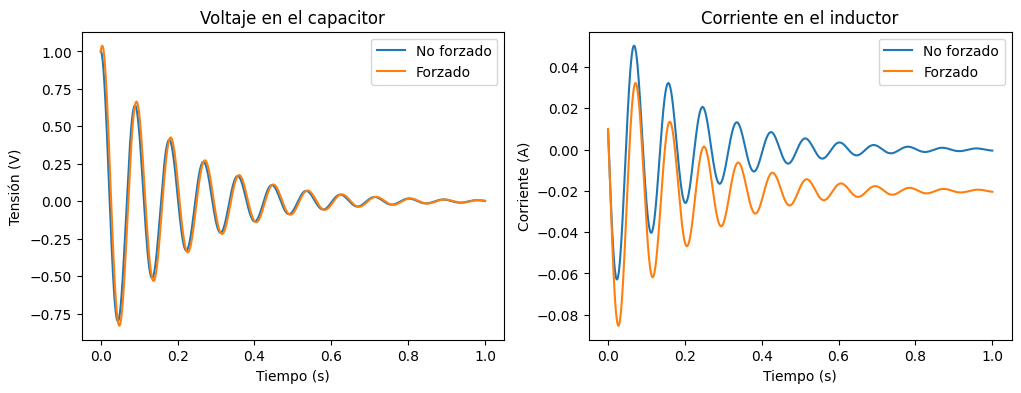

In [ ]:
# Graficar las soluciones en el tiempo
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)
ax[0].plot(t1, X[:,0], label='No forzado'), ax[1].plot(t1, X[:,1], label='No forzado')
ax[0].plot(t1, X_disp[:,0], label='Forzado'), ax[1].plot(t1, X_disp[:,1], label='Forzado')
ax[0].set_title('Voltaje en el capacitor'), ax[1].set_title('Corriente en el inductor')
ax[0].legend(), ax[1].legend()
ax[0].set_xlabel('Tiempo (s)'), ax[1].set_xlabel('Tiempo (s)')
ax[0].set_ylabel('Tensión (V)'), ax[1].set_ylabel('Corriente (A)')
plt.show()

## Construcción del diagrama de fase

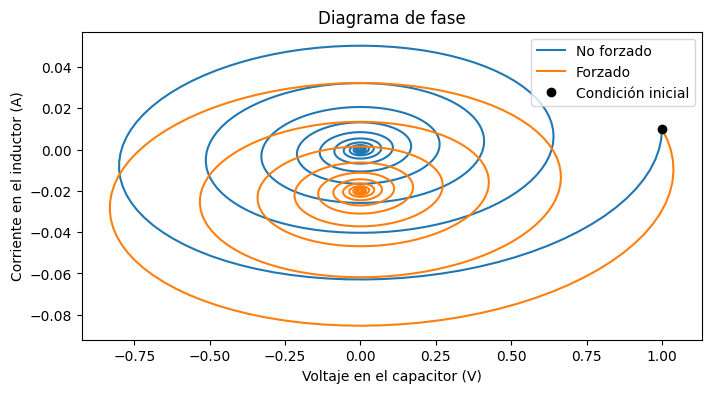

In [ ]:
# Graficar el diagrama de fase
plt.figure(figsize=(8,4))
plt.plot(X[:,0], X[:,1], label='No forzado')
plt.plot(X_disp[:,0], X_disp[:,1], label='Forzado')
plt.plot(X0_1[0], X0_1[1], 'ko', label='Condición inicial')
plt.xlabel('Voltaje en el capacitor (V)')
plt.ylabel('Corriente en el inductor (A)')
plt.title('Diagrama de fase')
plt.legend()
plt.show()

---
# Circuito RLC #2

## Uso de técnicas de integración numérica

In [ ]:
X0_2 = [1,  0.01]  # Condición inicial Circuito 2: [vC0, iL0]
t2 = np.linspace(0, 0.1, 1000)   # Vector de tiempos. Debe ser pensado teniendo en
                              # cuenta las dinámicas del sistema.

# Parámetros del sistema
L = 0.2       # Inductancia en henrios
C = 0.001     # Capacitancia en faradios
R_1 = 10    # Valor igual de R_1 y R_2 para amortiguamiento moderado
R_2 = 10

# Cálculo de la solución no forzada (vin = 0)
X2 = sp.odeint(LCRdif2, X0_2, t2, args=(L, C, R_1, R_2, 0))

# Cálculo de la solución forzada para vin = 2 V
X_disp2 = sp.odeint(LCRdif2, X0_2, t2, args=(L, C, R_1, R_2, 2))

## Graficación de las variables de estado en el tiempo

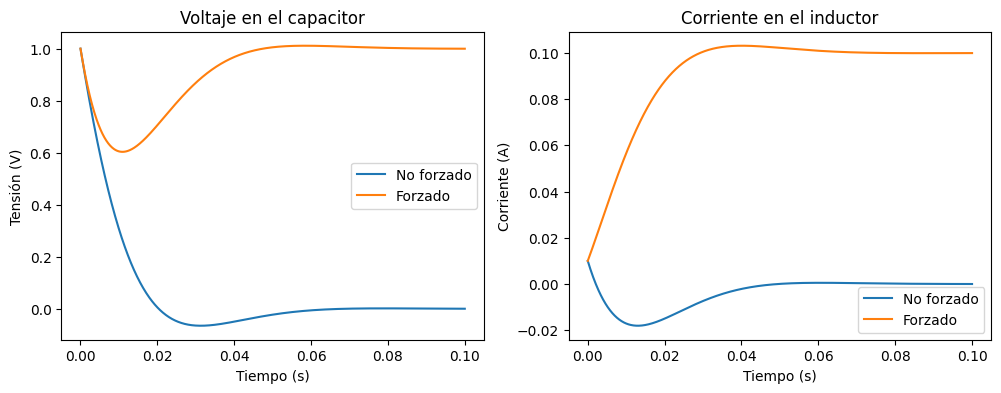

In [ ]:
# Graficar las soluciones en el tiempo
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)
ax[0].plot(t2, X2[:,0], label='No forzado'), ax[1].plot(t2, X2[:,1], label='No forzado')
ax[0].plot(t2, X_disp2[:,0], label='Forzado'), ax[1].plot(t2, X_disp2[:,1], label='Forzado')
ax[0].set_title('Voltaje en el capacitor'), ax[1].set_title('Corriente en el inductor')
ax[0].legend(), ax[1].legend()
ax[0].set_xlabel('Tiempo (s)'), ax[1].set_xlabel('Tiempo (s)')
ax[0].set_ylabel('Tensión (V)'), ax[1].set_ylabel('Corriente (A)')
plt.show()

## Construcción del diagrama de fase

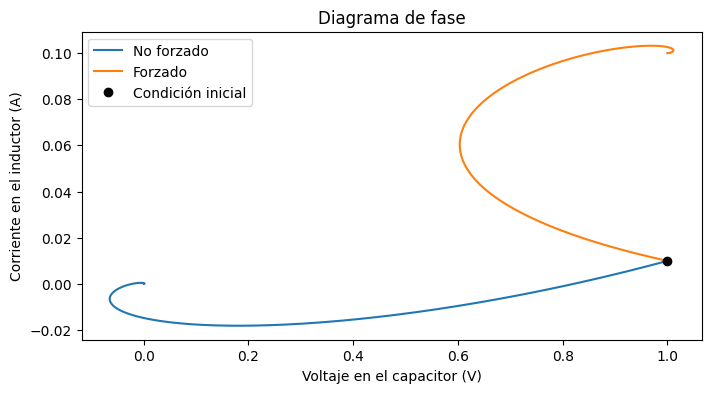

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(X2[:,0], X2[:,1], label='No forzado')
plt.plot(X_disp2[:,0], X_disp2[:,1], label='Forzado')
plt.plot(X0_2[0], X0_2[1], 'ko', label='Condición inicial')
plt.xlabel('Voltaje en el capacitor (V)')
plt.ylabel('Corriente en el inductor (A)')
plt.title('Diagrama de fase')
plt.legend()
plt.show()

---
# Variaciones Parámetros (En ambos circuitos)

In [ ]:
X0_1 = [1,  0.01]  # Condición inicial Circuito 1: [vC0, iL0]
t1 = np.linspace(0, 1, 1000)   # Vector de tiempos. Debe ser pensado teniendo en
                              # cuenta las dinámicas del sistema.
X0_2 = [1,  0.01]  # Condición inicial Circuito 2: [vC0, iL0]
t2 = np.linspace(0, 0.1, 1000)   # Vector de tiempos. Debe ser pensado teniendo en
                              # cuenta las dinámicas del sistema.
#CIRCUITO 1
# Parámetros del sistema (Sistema Sobreamortiguado)
L = 0.2  # Inductancia en henrios
C = 0.001  # Capacitancia en faradios
R = 1000  # Resistencia en ohmios

#CIRCUITO 2
# Parámetros del sistema (Sistema Sobreamortiguado)
L = 0.2       # Inductancia en henrios
C = 0.001     # Capacitancia en faradios
R_1 = 1000   # Valor igual de R_1 y R_2 para amortiguamiento moderado
R_2 = 1000

#CIRCUITO 1
# Cálculo de la solución no forzada (vin = 0)
X = sp.odeint(LCRdif, X0_1, t1, args=(L, C, R, 0))
# Cálculo de la solución forzada para vin = 2 V
X_disp = sp.odeint(LCRdif, X0_1, t1, args=(L, C, R, 2))

#CIRCUITO 2
# Cálculo de la solución no forzada (vin = 0)
X2 = sp.odeint(LCRdif2, X0_2, t2, args=(L, C, R_1, R_2, 0))
# Cálculo de la solución forzada para vin = 2 V
X_disp2 = sp.odeint(LCRdif2, X0_2, t2, args=(L, C, R_1, R_2, 2))

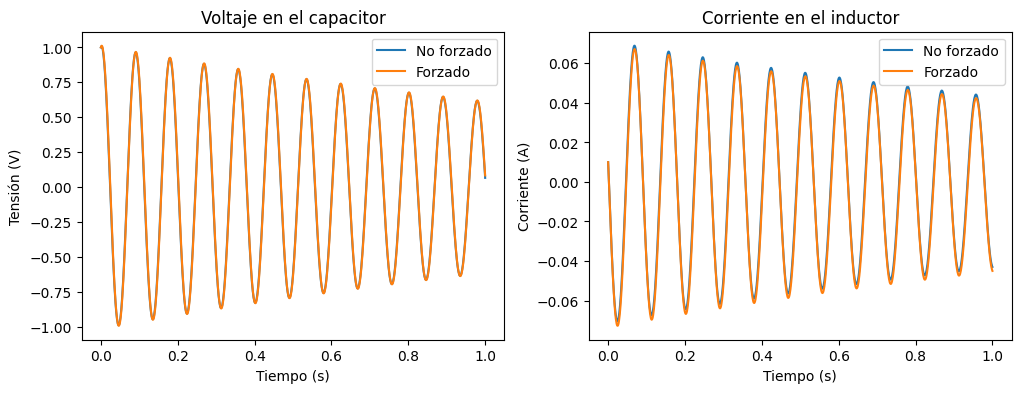

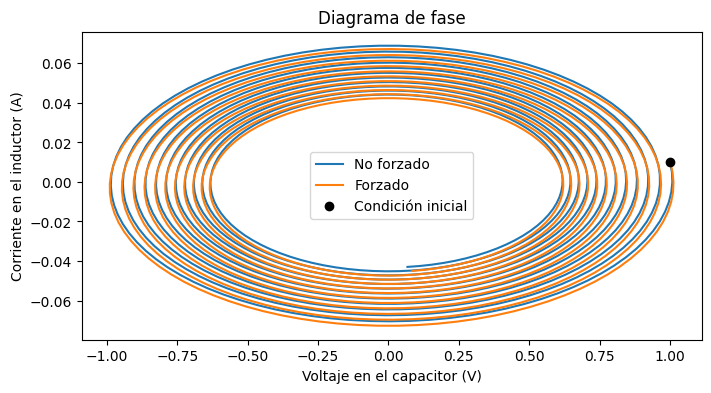

In [ ]:
#Circuito #1
# Graficar las soluciones en el tiempo
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)
ax[0].plot(t1, X[:,0], label='No forzado'), ax[1].plot(t1, X[:,1], label='No forzado')
ax[0].plot(t1, X_disp[:,0], label='Forzado'), ax[1].plot(t1, X_disp[:,1], label='Forzado')
ax[0].set_title('Voltaje en el capacitor'), ax[1].set_title('Corriente en el inductor')
ax[0].legend(), ax[1].legend()
ax[0].set_xlabel('Tiempo (s)'), ax[1].set_xlabel('Tiempo (s)')
ax[0].set_ylabel('Tensión (V)'), ax[1].set_ylabel('Corriente (A)')
plt.show()

# Graficar el diagrama de fase
plt.figure(figsize=(8,4))
plt.plot(X[:,0], X[:,1], label='No forzado')
plt.plot(X_disp[:,0], X_disp[:,1], label='Forzado')
plt.plot(X0_1[0], X0_1[1], 'ko', label='Condición inicial')
plt.xlabel('Voltaje en el capacitor (V)')
plt.ylabel('Corriente en el inductor (A)')
plt.title('Diagrama de fase')
plt.legend()
plt.show()

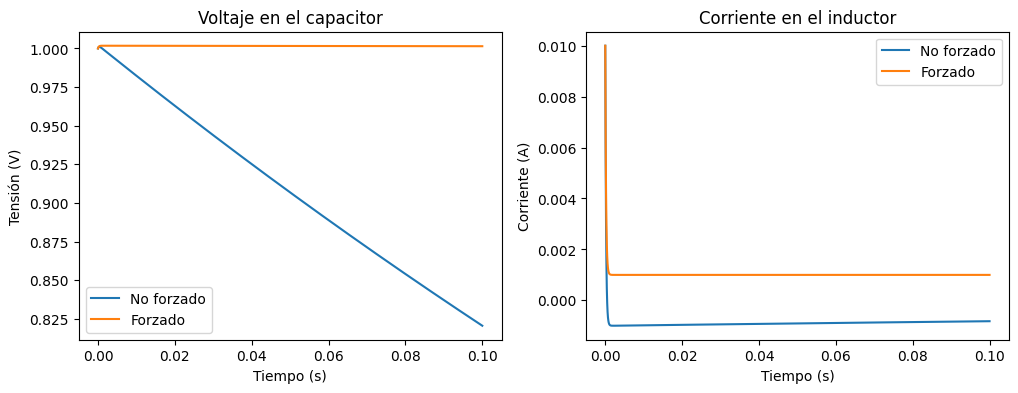

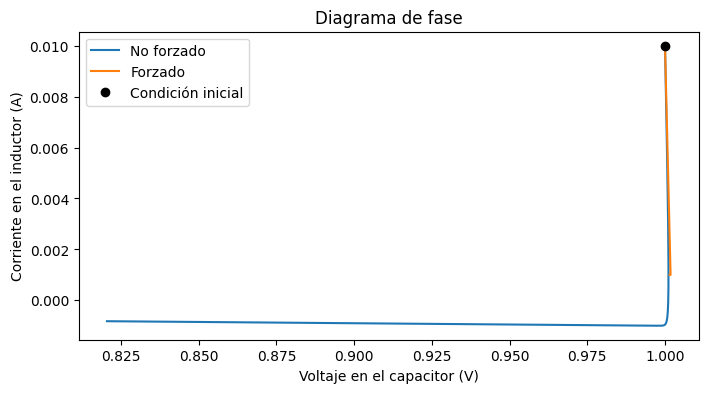

In [ ]:
# Circuito #2
# Graficar las soluciones en el tiempo
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)
ax[0].plot(t2, X2[:,0], label='No forzado'), ax[1].plot(t2, X2[:,1], label='No forzado')
ax[0].plot(t2, X_disp2[:,0], label='Forzado'), ax[1].plot(t2, X_disp2[:,1], label='Forzado')
ax[0].set_title('Voltaje en el capacitor'), ax[1].set_title('Corriente en el inductor')
ax[0].legend(), ax[1].legend()
ax[0].set_xlabel('Tiempo (s)'), ax[1].set_xlabel('Tiempo (s)')
ax[0].set_ylabel('Tensión (V)'), ax[1].set_ylabel('Corriente (A)')
plt.show()

plt.figure(figsize=(8,4))
plt.plot(X2[:,0], X2[:,1], label='No forzado')
plt.plot(X_disp2[:,0], X_disp2[:,1], label='Forzado')
plt.plot(X0_2[0], X0_2[1], 'ko', label='Condición inicial')
plt.xlabel('Voltaje en el capacitor (V)')
plt.ylabel('Corriente en el inductor (A)')
plt.title('Diagrama de fase')
plt.legend()
plt.show()